# <Center> Homework 4: Classification </center>

This assignment is about building classification models with labeled data. We will continue to use the dataset on human generated and AI generated reviews. The `text` column contains documents and the `label` column gives the label of each document. We will build classifers to detect AI generated content. 


## Q1 Classification

- Define a function `create_model(x_train, y_train, x_test, y_test, model_type='svm', stop_words='english', min_df = 1, print_result = True, algorithm_para=1.0`), where

    - `x_train`: is a list of documents for training
    - `y_train`: is the ground-truth labels of training documents
    - `x_test`: is a list of documents for test
    - `y_test`: is the ground-truth labels of test documents
    - `model_type`: two options: `nb` (Multinomial Naive Bayes) or `svm` (Linear SVM)
    - `stop_words`: indicate whether stop words should be removed. The default value is 'english', i.e. remove English stopwords.
    - `min_df`: only word with document frequency above this threshold can be included. The default is 1. 
    - `print_result`: controls whether to show classification report or plots. The default is True.
    - `algorithm_para`: hyperparameter of algorithms, refers to C in SVM and alpha in NB. Both C and alpha have default values of 1.0. Please check sklearn documentation here: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
    https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html


- This function does the following:
    - Fit a `TfidfVectorizer` using `x_train` with options `stop_words, min_df` as specified in the function inputs. Extract features from `train_docs` using the fitted `TfidfVectorizer`.
    - Build `linear SVM` or `Multinomial Naive Bayes` model as specified by `model_type` with `algorithm_para` setting. Train the model using the extracted features and `y_train`. 
    - Transform `x_test` by the fitted `TfidfVectorizer` (hint: use function `transform` not `fit_transform`).
    - Predict the labels for `x_test`. If `print_result` is True, print the classification report.
    - Calculate the AUC score and PRC score (or Average Precision) for class 1 on the test dataset. If `print_result` is True, plot the ROC and PRC curves. **Hint**: 
        - `sklearn.svm.LinearSVM` does not provide `predict_proba` function. 
        - Instead, you can use its `decision_function` (see <a href = "https://stackoverflow.com/questions/59227176/how-to-plot-roc-and-calculate-auc-for-binary-classifier-with-no-probabilities-s">some reference code</a>) 
        - Another option is to use `sklearn.svm.SVC` with `kernel='linear' and probability=False` (see <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html"> reference</a>)
    - Return the AUC and PRC scores.

    
- Test your function with following cases. **Explain your findings in text**. 
    - model_type='svm', stop_words = 'English', min_df = 2
    - model_type='nb', stop_words = 'English', min_df = 2

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

#load data
data=pd.read_csv("data.csv")
data

In [ ]:
# separate into train and test
x_train, x_test, y_train, y_test = train_test_split(\
                data["text"], data["label"], test_size=0.3, random_state=0)

In [ ]:
# Define the function for Task 1
def create_model(x_train, y_train, x_test, y_test, model_type='svm', stop_words='english', min_df = 1, print_result = True, algorithm_para=1.0):  
    vectorizer = TfidfVectorizer(stop_words=stop_words, min_df=min_df)
    x_train_tfidf = vectorizer.fit_transform(x_train)
    x_test_tfidf = vectorizer.transform(x_test)

    if model_type == 'svm':
        model = svm.LinearSVC(C=algorithm_para)
    elif model_type == 'nb':
        model = MultinomialNB(alpha=algorithm_para)
    
    model.fit(x_train_tfidf, y_train)

    if model_type == 'svm':
        y_scores = model.decision_function(x_test_tfidf)
    elif model_type == 'nb':
        y_scores = model.predict_proba(x_test_tfidf)[:, 1]
    
    y_pred = model.predict(x_test_tfidf)

    if print_result:
        print(classification_report(y_test, y_pred))

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    auc_score = auc(fpr, tpr)
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    prc_score = auc(recall, precision)

    if print_result:
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.plot(fpr, tpr)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('AUC')
        plt.subplot(1, 2, 2)
        plt.plot(recall, precision)
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('PRC')
        plt.tight_layout()
        plt.show()

    return auc_score, prc_score
# add your code   

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       597
           1       0.99      0.97      0.98       252

    accuracy                           0.99       849
   macro avg       0.99      0.98      0.98       849
weighted avg       0.99      0.99      0.99       849



c:\Users\kshag\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


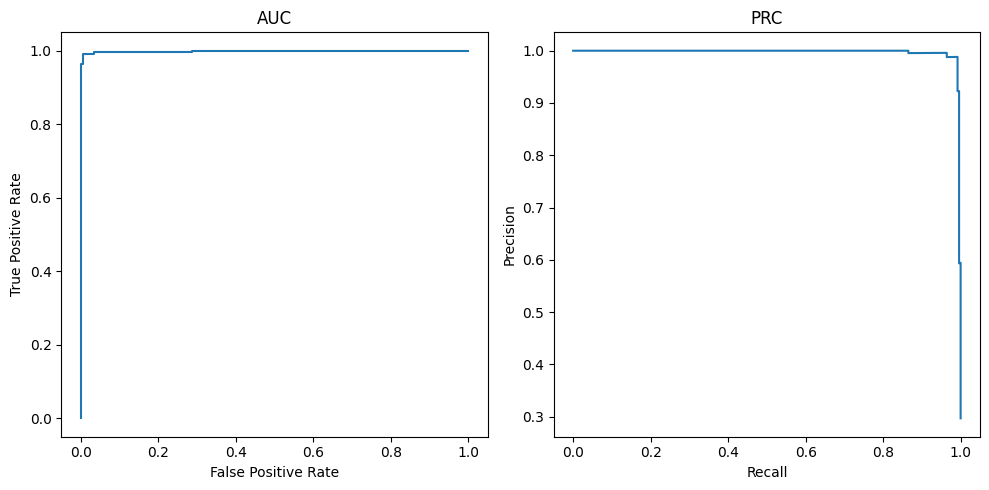

In [ ]:
# Test the function with 'svm'
# Explain your finding

auc_score, prc_socre = create_model(x_train, y_train, x_test, y_test, \
            model_type='svm',  min_df = 2, \
                  print_result=True, algorithm_para=1.0)


Explanation: SVM has almost perfect performance overall, especially in precision, meaning almost all positives identified for both classes were actually true positives. There is a slight decrease in recall for class 1 identification, which means that some true positives of class 1 were missed and not identified. This could potentially be due to the smaller class size (support) for class 1, since this issue is not present for class 0 which has more than double the support.

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       597
           1       1.00      0.83      0.90       252

    accuracy                           0.95       849
   macro avg       0.96      0.91      0.93       849
weighted avg       0.95      0.95      0.95       849



C:\Users\kshag\AppData\Local\Temp\ipykernel_30184\3636837888.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\kshag\AppData\Local\Temp\ipykernel_30184\3636837888.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


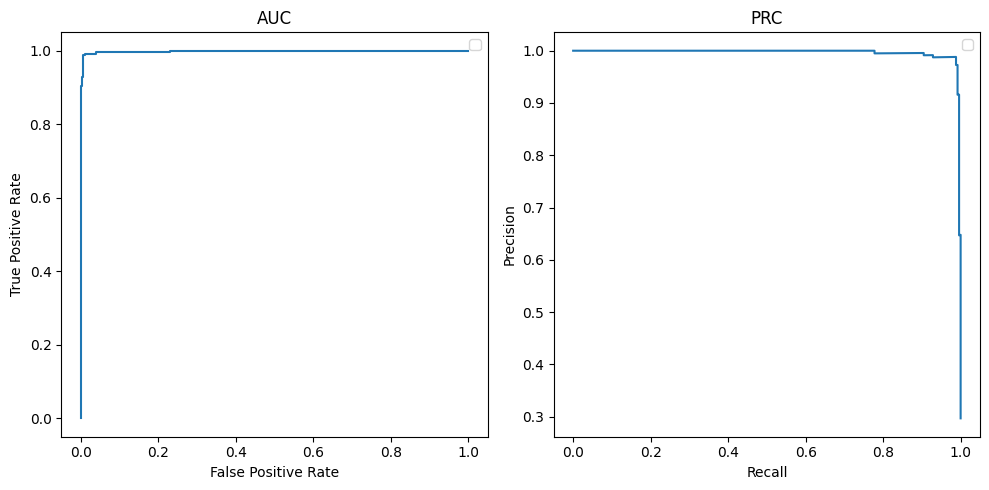

In [23]:
# Test the function with 'nb' 
# Explain your finding

auc_score, prc_socre = create_model(x_train, y_train, x_test, y_test,\
            model_type='nb', min_df = 2, \
              print_result=True, algorithm_para=1.0)

Explanation: NB model performs pretty well also, gaining full 100% on precision of class 1 (meaning all class 1 labels identified were true positives) and on recall for class 0 (meaning all true positives of class 0 were identified). However, the NB model struggled with recall of class 1 (meaning quite a few true positive instances of class 1 were missed) and slightly struggled with precision of class 0 (meaning some items classified as class 0 were false positives). These two things together show that overall the NB model had an issue with misidentifying items of class 1 and mislabeling them as class 0, however it had perfect performance of class 0. This could once again be due to the misbalance of class support sizes.

### Task 2: Search for best parameters 

From Task 1, you may find there are many possible ways to configure parameters. Next, let's use grid search to find the optimal parameters

- Define a function `search_para(docs, y)` where `docs` are training documents and `y` is the ground-truth labels.
- This function does the following:
    - Create a pipleline which integrates `TfidfVectorizer` and `NB` classifier, since the performance is not entirely good 
    - Define the parameter ranges as follow:
        - `stop_words': [None, 'english']`
        - `min_df: [1,2,5]`
        - `alpha: [0.1,0.5,1]`
    - Set the scoring metric to "f1_macro"
    - Use `GridSearchCV` with `5-fold cross validation` to find the best parameter values based on the training dataset. 
    - Print the best parameter values
    
- Call the function `NB_model` defined in Task 1 `with the best parameter values`. You will have to add the best alpha value to the original function, because you used default settings of the NB classifier previously. Then please briefly answer the following:
    - Compare with the model in Task 1, how is the performance different?
    - Do you think the new parameter values help classification?

In [26]:
# Define grade search function
def search_para(docs, y):
    pipeline = Pipeline([('vectorizer', TfidfVectorizer()), ('classifier', MultinomialNB())])

    param_grid = {
        'vectorizer__stop_words': [None, 'english'],
        'vectorizer__min_df': [1, 2, 5],
        'classifier__alpha': [0.1, 0.5, 1]
    }
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='f1_macro', cv=5, verbose=1)
    grid_search.fit(docs, y)
    print("Best parameters found:", grid_search.best_params_)
    return grid_search.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters found: {'classifier__alpha': 0.1, 'vectorizer__min_df': 5, 'vectorizer__stop_words': 'english'}
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       597
           1       1.00      0.99      0.99       252

    accuracy                           1.00       849
   macro avg       1.00      0.99      0.99       849
weighted avg       1.00      1.00      1.00       849



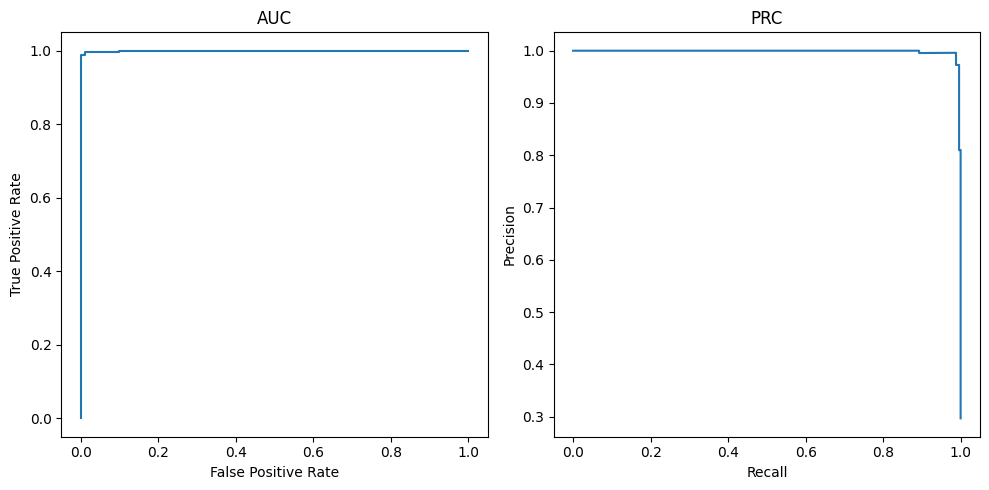

In [31]:
# call your function
best_params =search_para(data["text"],data["label"])
# call the function with the best parameters and explain your findings. 

auc_score, prc_socre = create_model(x_train, y_train, x_test, y_test,\
            model_type='nb', min_df = best_params['vectorizer__min_df'], \
              print_result=True, algorithm_para=best_params['classifier__alpha'], stop_words=best_params['vectorizer__stop_words'])



- Compare with the model in Task 1, how is the performance different?

The precision of class 0 has increased from 0.93 to 0.99
The recall of class 1 has increased from 0.83 to 0.99
The f-score of class 0 has increased from 0.96 to a perfect 1.00
The f-score of class 1 has increased from 0.90 to 0.99
- Do you think the new parameter values help classification?

Yes, it is evident that the new parametr values significantly help with classification, taking the NB model from a struggling performance with class 1 identification to an almost perfect performance. 

## Task 3. How many training samples are enough? 

This task is to help you understand the impact of training and testing sample size on classifier performance. 

- Define a function `sample_size_impact(docs,y)` with the input as defined above. 
    
    
- This function does the following:
    - Iterate the percentage of testing data in train/test split, from 0.9 to 0.1 with a step of 0.1. In this case, you start with 10% of training data and 90% of testing data, and end up with 90% of training data and 10% of testing data. 
    - In each round, call the `create_model` function with `model_type='svm'` and  `model_type='nb'` and `stop_words='english'`. Keep other parameters as default. Record the AUC score of each model type and the sample size.
    - After all the interations, for each model type, plot a line chart show the relationship between sample size and the AUC score. 
    - This function has no return.
    
    
- Write your analysis on the following:
    - How training and testing sample size affects each classifier’s performance? 
    - How is performance of SVM classifier compared with Naïve Bayes classifier?

In [ ]:
# Show the impact of sample size
def sample_size_impact(docs, y):
    svm_auc_scores = []
    nb_auc_scores = []
    sample_sizes = []

    for test_size in np.arange(0.9, 0.0, -0.1):
        sample_sizes.append(test_size)
        x_train, x_test, y_train, y_test = train_test_split(docs, y, test_size=test_size, random_state=42)
        svm_auc, _ = create_model(x_train, y_train, x_test, y_test, model_type='svm', stop_words='english', print_result=False)
        svm_auc_scores.append(svm_auc)
        nb_auc, _ = create_model(x_train, y_train, x_test, y_test, model_type='nb', stop_words='english', print_result=False)
        nb_auc_scores.append(nb_auc)

    plt.figure(figsize=(8, 6))
    plt.plot(sample_sizes, svm_auc_scores, label='SVM', marker='o', color='orange')
    plt.plot(sample_sizes, nb_auc_scores, label='NB', marker='o', color='blue')
    plt.xlabel('Testing Sample Percentage')
    plt.ylabel('AUC')
    plt.title('Impact of Sample Size on AUC Scores')
    plt.legend()
    plt.grid(True)
    plt.show()

c:\Users\kshag\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\kshag\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\kshag\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\kshag\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of 

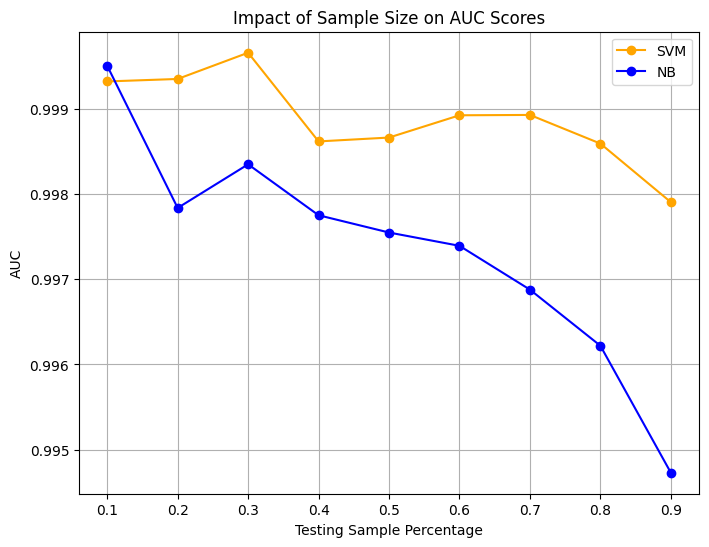

In [33]:
# Test the function

sample_size_impact(data["text"],data["label"])

# Briefly answer the questions

- How training and testing sample size affects each classifier’s performance? 
Overall, both of the classifier models perform much better with a lower testing sample size and a higher training size. The AUC scores decrease as the percentage of the testing sample increases and the training percentage decreases. This is an intuitive result, as if a model has less data to train on, we can intuitively expect the results to be less accurate.
- How is performance of SVM classifier compared with Naïve Bayes classifier?
The SVM classifier overall performs better on this data set, but moreso performs much better than NB with higher testing sample percentages. The NB model's performance drops of significantly as testing percentage increases, while in comparison the SVM classifier only slightly drops off. The gap in performance between the two models also widens testing sample percentage increases. 

## Bonus: How to improve AI generated content detection?

- Can you tune other parameters of TfidfVectorizer or algorithms to further improve the classification performance? Try to beat the model you get in Task 2!

In [ ]:
 # add your code here